## 1. Import Libraries and Load for Each Dataset (Fraud Username List Dataset and All Username List Dataset)

In [160]:
"""
Meng-import library-library yang akan digunakan di dalam penelitian kali ini
seperti library untuk membuat visualisasi data, library untuk mengeksplorasi data,
library untuk membersihkan data dan memodelkan data yang telah dibersihkan menggunakan Algoritma Machine Learning
dengan tujuan agar dapat mengklasifikasikan akun/username fraud dan bukan fraud berdasarkan kategori label
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### 1.1.  Exploring Data from All Username/Account List Dataset (Both Fraud and Non-Fraud Accounts) and Preprocessing the Dataset 

In [161]:
"""
Membaca dataset yang berisikan seluruh daftar akun/username, baik akun fraud ataupun bukan fraud
dari file excel "All Username List Dataset" serta menampilkan 5 data terbawah
"""
all_username_list = pd.read_excel("All Username List Dataset.xlsx")

all_username_list.tail()

,No,Nama Akun,TANGGAL UPDATE
4513,NaN,JECKPOT,NaT
4514,NaN,Defzz,NaT
4515,NaN,M M,NaT
4516,NaN,BrenzSTORE,NaT
4517,NaN,Tosca Cell,NaT


In [162]:
# Menampilkan 19 data teratas yang dimiliki oleh variabel DataFrame "all_username_list"
all_username_list.head(19)

,No,Nama Akun,TANGGAL UPDATE
0,1.0,Maldini,2022-08-19
1,2.0,Ibnu,2022-08-19
2,3.0,Trimo,2022-08-19
3,4.0,Juned,2022-08-19
4,5.0,Gerar,2022-08-19
5,6.0,Gundul,2022-08-19
6,7.0,Saridi,2022-08-19
7,8.0,snfi,2022-08-19
8,9.0,Linda,2022-08-19
9,10.0,Ruby,2022-08-19


Berdasarkan output dari kesembilan belas data yang berhasil ditampilkan dari variabel DataFrame "all_username_list", kita dapat mengetahui jika akun yang termasuk ke dalam file dataset "All Username List Dataset.xlsx" terakhir kali mengalami update di tanggal 19 Agustus 2022. Hal ini dapat kita asumsikan jika 19 data dari hasil output diatas merupakan data-data akun e-wallet yang mengalami update terakhir di tanggal 19 Agustus 2022.

Selain itu perlu diingat dan diketahui kembali jika file dataset "All Username List Dataset.xlsx" yang memiliki format Microsoft Excel ini merupakan sebuah dataset dari hasil pendaftaran akun-akun e-wallet dari suatu layanan financial technology (fintech). Seluruh akun yang terdapat di dalam file dataset "All Username List Dataset.xlsx" merupakan gabungan akun antara akun fraud (akun penipuan) dan akun non-fraud atau akun yang bukan penipuan. Maka dari itu penelitian ini bertujuan untuk dapat mengklasifikasikan antara akun fraud dan akun bukan fraud sehingga akan memudahkan pengambilan keputusan dalam memberikan layanan terbaiknya dan dapat mencegah atau mem-blacklist akun-akun yang tergolong sebagai akun penipuan agar tidak ada yang dirugikan. Dikarenakan variabel DataFrame "all_username_list" merupakan gabungan antara akun fraud dan akun non-fraud dan penelitian ini bertujuan untuk mengklasifikasikan kedua data tersebut, maka dari itu penelitian ini akan menggunakan 1 data yang lain yaitu dataset yang khusus menyimpan nama-nama akun yang terindikasi sebagai akun fraud sehingga jika suatu akun yang tersimpan di dalam variabel DataFrame "all_username_list" tersimpan juga di dalam dataset tersebut, maka label/kategori yang akan diberikan adalah "fraud". Sebaliknya jika suatu akun dari variabel DataFrame "all_username_list" tidak dimiliki oleh dataset yang khusus menyimpan nama akun fraud, maka label/kategori yang akan diberikan untuk akun tersebut adalah "non_fraud".

In [163]:
# Menampilkan nama-nama kolom yang dimiliki oleh variabel DataFrame "all_username_list"
all_username_list.columns

Index(['No', 'Nama Akun', 'TANGGAL UPDATE'], dtype='object')

Hasil diatas menunjukkan jika variabel DataFrame "all_username_list" hanya memiliki 3 kolom saja yaitu kolom "No", "Nama Akun" dan terakhir adalah kolom "TANGGAL UPDATE". Khusus untuk kolom "No" saya akan menghapus kolom tersebut dikarenakan kolom "No" merupakan kolom yang tidak dibutuhkan selama proses penelitian ini berlangsung. Penyebab utama mengapa kolom "No" akan dihilangkan adalah data-data yang terdapat di dalam kolom ini hanya menunjukkan nomor baris dari masing-masing akun e-wallet saja.

Karena pada DataFrame sudah terdapat nomor indeks yang berfungsi sebagai penunjuk baris dari masing-masing nama akun e-wallet yang berhasil terdaftar di perusahaan PT XYZ, maka kolom "No" sudah tidak dibutuhkan. Selain itu, penelitian ini juga akan mengubah format penamaan kolom menjadi lebih rapi dan teratur karena seperti yang terlihat dari hasil output diatas, gaya penulisan antara kolom "Nama Akun" dan kolom "TANGGAL UPDATE" sangat jauh berbeda. Maka dari itu perubahan format penulisan nama kolom akan dilakukan di dalam penelitian ini.

In [164]:
# Menghapus kolom "No" dari daftar kolom pada variabel DataFrame "all_username_list" serta menampilkan 9 data teratas
all_username_list = all_username_list.drop(columns=["No"], axis=1)

all_username_list.head(9)

,Nama Akun,TANGGAL UPDATE
0,Maldini,2022-08-19
1,Ibnu,2022-08-19
2,Trimo,2022-08-19
3,Juned,2022-08-19
4,Gerar,2022-08-19
5,Gundul,2022-08-19
6,Saridi,2022-08-19
7,snfi,2022-08-19
8,Linda,2022-08-19


Hasil diatas menunjukkan bahwasanya saya telah berhasil menghilangkan kolom "No" dari variabel DataFrame "all_username_list" karena kolom tersebut tidak dibutuhkan karena tujuan kolom "No" hanya menjadi penunjuk nomor baris untuk masing-masing nama akun yang berhasil terdaftar dan ter-update. Sementara itu pada format DataFrame dari library Pandas telah menyediakan indeks data yang berfungsi untuk menjadi penunjuk nomor baris dari masing-masing data yang tersimpan di dalam dataset.

Maka dari itu kolom "No" dihapus/dihilangkan dan saat ini variabel DataFrame "all_username_list" hanya memiliki 2 kolom saja yaitu kolom "Nama Akun" dan "TANGGAL UPDATE". Selanjutnya kedua kolom tersebut akan diubah format penamaan kolom menjadi lebih teratur dan rapi karena menurut saya dengan format penamaan kolom seperti saat ini sangat tidak rapi dan tidak terstruktur sehingga akan dibuat seragam.

In [165]:
"""
Mengubah format penamaan tulisan pada kolom "Nama Akun" menjadi "account_name"
dan "TANGGAL UPDATE" menjadi "updated_date" dari variabel DataFrame "all_username_list"
"""
all_username_list = all_username_list.rename(columns={"Nama Akun": "account_name", "TANGGAL UPDATE": "updated_date"})

all_username_list.tail(18)

,account_name,updated_date
4500,Aiwaah Cell,NaT
4501,Mirza Store,NaT
4502,Mirza Store,NaT
4503,Jzjwoeij,NaT
4504,DANZZ STORE,NaT
4505,Neng Sungai Bulan,NaT
4506,Refund,NaT
4507,Lordbase,NaT
4508,ATHA CELL,NaT
4509,QUICKSILVERZ,NaT


In [166]:
# Menampilkan jumlah baris dan jumlah kolom yang dimiliki oleh variabel DataFrame "all_username_list"
all_username_list.shape

(4518, 2)

Berdasarkan hasil diatas dapat diketahui jika variabel DataFrame "all_username_list" memiliki jumlah baris data sebanyak 4.518. Sementara itu jumlah kolom yang terdapat di dalam DataFrame "all_username_list" adalah 2. Kedua kolom yang dimiliki oleh DataFrame "all_username_list" adalah kolom "account_name" dan kolom "updated_date". Namun yang perlu diketahui adalah jika variabel DataFrame "all_username_list" memiliki beberapa nilai yang hilang (missing value) karena berdasarkan 5 dan 18 data terakhir yang ditampilkan, akun/username yang bernama "JECKPOT", "Aiwaah Cell", "Defzz", "Mirza Store", "Neng Sungai Bulan" "M M", "BrenzSTORE", "Tosca Cell", dll., tidak memiliki nilai di kolom "updated_date". Hal ini sangat berbanding terbalik dengan 19 data teratas dari DataFrame "all_username_list" yang telah ditampilkan di mana kesembilan belas data tersebut memiliki nilai di kolom "updated_date".

Maka dari itu saya akan menampilkan jumlah missing value dari kedua kolom pada variabel DataFrame "all_username_list" sehingga kita dapat mengetahui seberapa banyak nilai data yang hilang dari DataFrame.

In [167]:
# Menampilkan jumlah missing value/nilai data yang hilang dari variabel DataFrame "all_username_list"
print("Jumlah Nilai Data yang Hilang (Missing Value) dari Variabel DataFrame 'all_username_list':")
print(all_username_list.isnull().sum())

Jumlah Nilai Data yang Hilang (Missing Value) dari Variabel DataFrame 'all_username_list':
account_name      0
updated_date    208
dtype: int64


Hasil diatas menunjukkan jika terdapat 208 missing value/nilai yang hilang dari kolom "updated_date" pada variabel DataFrame "all_username_list". Missing value adalah sebuah indikator nilai di dalam DataFrame di mana suatu cell atau baris data tidak menyimpan informasi nilai data yang seharusnya. Sebagai contoh pada indeks data ke-4517 atau baris data ke-4.518, sebuah akun bernama "Tosca Cell" tidak memiliki informasi nilai di dalam kolom "updated_date" dan hanya terdapat label/nilai NaN.

NaN atau Not a Number merupakan sebuah tanda jika baris data dalam suatu kolom tidak memiliki nilai karena jika di analisa lebih mendalam seharusnya indeks data ke-4517 dengan nama akun "Tosca Cell" memiliki nilai di kolom "updated_date" yang di mana kolom tersebut harus berisikan tanggal perubahan atas pendaftaran pertama terhadap masing-masing akun e-wallet yang berhasil tercatat di dalam sistem perusahaan milik PT XYZ yang bergerak di bidang financial technology. Namun karena tanggal perubahan untuk akun "Tosca Cell" tidak berhasil ter-record dengan baik di dalam kolom "updated_date", maka nilai yang terdapat di dalam kolom tersebut adalah NaN/Not a Number yang mengartikan baris tersebut adalah missing value.

Hal tersebutlah menjadi masalah karena saat ini yang terjadi di dalam variabel DataFrame "all_username_list" adalah pada kolom "updated_date" masih terdapat 208 data yang hilang (missing value) sehingga data-data yang hilang harus dibersihkan terlebih dahulu sebelum mengklasifikasikan data menggunakan Algoritma Machine Learning atau membuat data visualisasi. Jika nilai-nilai yang hilang tersebut dihilangkan/dihapus dari kolom "updated_date" yang terdapat di dalam DataFrame "all_username_list", maka proses analisis dan memberikan label/kategori pada setiap nama akun/username dari "all_username_list" untuk mengetahui akun penipuan dan akun bukan penipuan menjadi tidak valid dan penelitian ini akan kekurangan data. Maka dari itu proses pengecekan akun penipuan dan akun bukan penipuan akan dilakukan oleh 2 dataset. Dataset pertama yang saat ini telah menjadi DataFrame dengan nama "all_username_list" dan dataset kedua memiliki nama file yaitu "Fraud Username List Dataset.xlsx" dengan format Microfost Excel. Sehingga nilai-nilai data yang masing NULL akan mengambil nilai dari dataset dengan nama "Fraud Username List Dataset.xlsx". Tetapi walaupun begitu, 

Walaupun begitu tidak dapat dipastikan jika sebanyak 208 data akun e-wallet yang terdapat di dalam DataFrame "all_username_list" merupakan akun-akun e-wallet fraud karena jika seluruh akun e-wallet yang saat ini tidak memiliki nilai di kolom "updated_date" ternyata merupakan akun fraud, maka akan sangat mudah untuk mentransformasikan missing value menjadi nilai tanggal update yang diambil dari dataset yang khusus menyimpan daftar akun e-wallet dengan kategori fraud. Namun sebaliknya, jika seluruh akun e-wallet atau beberapa akun yang saat ini memiliki missing value di dalam kolom "updated_date" bukan akun fraud sehingga tidak dapat mengubah missing value menjadi nilai tanggal update yang diambil dari dataset "Fraud Username List Dataset.xlsx", maka cara yang akan dilakukan oleh penelitian ini adalah menghapus data-data tersebut sehingga tidak akan variabel DataFrame "all_username_list" tidak akan menyimpan missing value.

In [168]:
# Menampilkan tipe data yang dimiliki oleh masing-masing kolom dari variabel DataFrame "all_username_list"
all_username_list.dtypes

account_name            object
updated_date    datetime64[ns]
dtype: object

Hasil diatas menunjukkan jika tipe data yang dimiliki oleh variabel DataFrame "all_username_list" hanya tipe data object/string dan tipe data datetime. Tipe data object/string menunjukkan jika suatu kolom di dalam DataFrame memiliki nilai yang bukan hanya terdiri dari bilangan angka numerik saja, seperti bilangan pecahan/desimal dengan tipe data float dan bilangan bulat dengan tipe data integer, tetapi tipe data object/string terdiri dari nilai-nilai data dari suatu kolom yang ditulis dengan kumpulan karakter spesial, simbol-simbol, kumpulan huruf sehingga membantuk suatu kalimat teks serta gabungan antara angka dan juga huruf dan simbol/karakter spesial. Contoh dari data yang memiliki tipe data object/string adalah "Sigit", "Kemerdekaan Indonesia 1945", "17 Agustus 1945", "Sandi_Object18@@9", "Ibnu_Maldini991@gmail.com", dst. Jika terdapat data seperti kelima contoh tersebut dapat dipastikan jika data tersebut bertipe data object/string. Kolom yang memiliki tipe data object/string dari variabel DataFrame "all_username_list" adalah kolom "account_name".

Sementara itu tipe data datetime adalah sebuah tipe data yang biasanya menunjukkan karakteristik data dari suatu event atau kejadian seperti pembelian suatu barang, persediaan barang masuk untuk jumlah stok, tanggal registrasi/pendaftaran akun e-wallet seperti pada penelitian kali ini serta tanggal perubahan suatu data. Intinya tipe data datetime merupakan tipe data yang sesuai untuk kolom "updated_date" karena data-data yang terdapat di dalam kolom tersebut menunjukkan tanggal perubahan atas pendaftaran dari seluruh akun e-wallet, baik akun fraud dan akun non-fraud. Kolom yang memiliki tipe data datetime dari variabel DataFrame "all_username_list" adalah kolom "updated_date".

In [169]:
"""
Menampilkan jumlah data unik dari masing-masing kolom yang terdapat pada variabel
DataFrame "all_username_list" yaitu kolom "account_name" dan "updated_date"
"""
all_username_list.nunique()

account_name    3464
updated_date      51
dtype: int64

Hasil output diatas menunjukkan jika kolom "account_name" memiliki jumlah total data unik sebanyak 3.464 akun e-wallet sedangkan kolom "updated_date" memiliki jumlah total data unik sebanyak 51 data. Perlu diketahui jika jumlah data unik ini tidak akan berkurang jika missing value/data duplikat yang terdapat pada variabel DataFrame "all_username_list" dihapus.

In [170]:
# Menampilkan jumlah data duplikat dari variabel DataFrame "all_username_list"
print("Jumlah Total Data Duplikat dari Variabel DataFrame 'all_username_list' adalah:", all_username_list.duplicated().sum())

Jumlah Total Data Duplikat dari Variabel DataFrame 'all_username_list' adalah: 372


Berdasarkan hasil diatas dapat diketahui jika variabel DataFrame "all_username_list" memiliki data duplikat dengan total jumlah duplikat sebanyak 372 data. Data duplikat merupakan suatu nilai data yang memiliki kesamaan nilai antara satu baris dengan baris lainnya. Sebagai contoh pada baris pertama, kolom "A" memiliki nilai yang tersimpan yaitu "1891", kolom "B" memiliki nilai yakni "Ahmad" dan kolom "C" memiliki nilai data yaitu "Jl. Pangeran no.781 Blok BD7". Di samping itu, pada baris data kedua puluh, kolom "A", kolom "B" dan kolom "C" juga memiliki nilai data yang sama seperti pada baris data pertama yaitu "1891", "Ahmad" dan "Jl. Pangeran no.781 Blok BD7". Jika terdapat pola pada suatu baris yang tersimpan di dalam DataFrame maka data tersebut dapat disimpulkan sebagai data duplikat.

Alasan utama mengapa data duplikat yang saat ini tersimpan di dalam variabel DataFrame "all_username_list" harus dihapus adalah karena data duplikat dapat menganggu dan mengacaukan kesimpulan akhir sehingga analisis yang akan dihasilkan menjadi kurang tepat serta hasil prediksi yang akan dihasilkan oleh Algoritma Machine Learning menjadi tidak dapat dipercaya karena Algoritma Machine Learning yang kita define harus mempelajari pola data-data duplikat. Maka dari itu sebanyak 372 data duplikat yang saat ini masih tersimpan di dalam DataFrame "all_username_list" akan saya hapus menggunakan fungsi ".drop_duplicates()" dari Library Pandas.

In [171]:
"""
Menampilkan jumlah frekuensi/kemunculan dari masing-masing data pada kolom "account_name"
dan kolom "updated_date" sebelum 372 data duplikat dihapus dari variabel DataFrame "all_username_list"
"""
print(all_username_list["account_name"].value_counts(), "\n")

print(all_username_list["updated_date"].value_counts())

ARNOLD SUMALIE      81
Sunata              22
Reyhan              22
Yunus               19
Atin                17
                    ..
YUDA RAHMA           1
Surya indra jaya     1
Ummi                 1
HERMANSYAH           1
Tosca Cell           1
Name: account_name, Length: 3464, dtype: int64 

2022-10-25    317
2022-12-13    310
2022-08-25    301
2022-08-20    268
2022-12-26    255
2022-12-25    251
2022-08-19    163
2022-11-25    153
2022-12-12    146
2022-09-25    134
2024-01-01    132
2023-12-31    130
2023-04-14    123
2023-12-30    116
2023-12-29    108
2022-12-24     88
2023-04-12     86
2023-04-13     78
2023-04-04     78
2023-04-10     76
2023-04-17     73
2023-04-07     70
2023-04-03     69
2023-04-19     69
2023-04-08     68
2023-04-11     68
2023-12-25     67
2023-04-05     66
2023-04-09     65
2023-04-20     64
2023-04-16     63
2023-12-28     51
2023-04-06     47
2023-04-18     43
2023-12-26     33
2023-12-27     27
2022-08-26     15
2023-08-12     14
2023-03-24    

Hasil diatas menunjukkan jumlah frekuensi/kemunculan data dari kedua kolom yang dimiliki oleh variabel DataFrame "all_username_list" yaitu kolom "account_name" dan kolom "updated_date".

Pada kolom "account_name", jumlah kemunculan (frekuensi) untuk nama akun e-wallet yakni ARNOLD SUMALIE menjadi yang paling sering terlihat di dalam variabel DataFrame "all_username_list" dengan jumlah total kemunculan nilai sebanyak 81 kali. Namun perlu diingat bahwasanya jumlah frekuensi/kemunculan nilai data untuk nama akun ARNOLD SUMALIE sebanyak 81 kali ini sebelum 372 data duplikat pada DataFrame berhasil dihilangkan. Walaupun begitu nama akun ARNOLD SUMALIE yang memiliki jumlah frekuensi sebanyak 81 kali ini menjadi akun yang paling sering muncul di dalam kolom "account_name" yang terdapat di dalam variabel DataFrame "all_username_list". Di samping itu, akun e-wallet yang bernama Sunata juga memiliki jumlah total frekuensi tertinggi kedua setelah akun e-wallet ARNOLD SUMALIE karena akun Sunata telah muncul di dalam kolom "account_name" sebanyak 22 kali. Sedangkan nama akun e-wallet seperti YUDA RAHMA, Surya indra jaya, Ummi, HERMANSYAH dan Tosca Cell memiliki nilai frekuensi/kemunculan data paling rendah yaitu hanya 1 kali muncul di dalam kolom "account_name".

Sementara itu pada kolom "updated_date", jumlah frekuensi/kemunculan paling tinggi untuk tanggal perubahan atas masing-masing nama akun e-wallet adalah pada tanggal 2022-10-25 dengan jumlah kemunculan sebanyak 317 kali. Hal ini menyimpulkan jika pada periode 25 Oktober 2022 sebanyak 317 nama akun e-wallet berhasil ter-record atau tersimpan di dalam dataset dan mungkin juga dalam periode tersebut sebanyak 317 akun e-wallet mengalami perubahan terakhirnya. Sementara itu, tanggal perubahan untuk keenam periode yaitu 19 Maret 2023 (2023-03-19), 2 Januari 2024 (2024-01-02), 6 Agustus 2023 (2023-08-06), 8 Agustus 2023 (2023-08-08), 21 April 2023 (2023-04-21) dan 29 Januari 2024 (2024-01-29) memiliki jumlah nilai kemunculan yang sama di dalam kolom "updated_date" yaitu hanya muncul sebanyak 1 kali saja. Di samping itu dari hasil output diatas juga menunjukkan jika tahun perubahan yang terdapat di dalam dataset yang akhirnya digunakan di dalam DataFrame "all_username_list" dimulai dari tahun 2022 Bulan Agustus tanggal 19 hingga tahun 2024 Bulan Januari tanggal 29 namun perubahan tersebut tidak dilakukan dengan terstruktur secara periode waktu tertentu.

In [172]:
"""
Menghapus 372 data duplikat yang terdapat di dalam variabel
DataFrame "all_username_list" serta menampilkan kembali jumlah data duplikat
untuk memastikan apakah 372 data duplikat yang sebelumnya terdapat di dalam variabel DataFrame
"all_username_list" telah berhasil dihilangkan atau tidak
"""
all_username_list = all_username_list.drop_duplicates()

print("Jumlah Total Data Duplikat setelah 372 Data Duplikat Dihilangkan dari Variabel DataFrame 'all_username_list' adalah:",
      all_username_list.duplicated().sum())

Jumlah Total Data Duplikat setelah 372 Data Duplikat Dihilangkan dari Variabel DataFrame 'all_username_list' adalah: 0


Berdasarkan hasil diatas dapat diketahui jika variabel DataFrame "all_username_list" saat ini sudah tidak memiliki data duplikat karena 372 data duplikat sebelumnya telah berhasil dihilangkan/dihapus dari variabel DataFrame "all_username_list". Maka dari itu data-data yang saat ini tersimpan di dalam variabel DataFrame "all_username_list" merupakan data-data unik yang tersimpan di kedua kolom, baik kolom "account_name" dan kolom "updated_date", dan sudah tidak terdapat duplikasi/kesamaan nilai data seperti nama akun dan tanggal update yang sama tetapi terdapat di 2 baris berbeda.

In [173]:
# Menampilkan jumlah total data dan kolom yang dimiliki oleh DataFrame "all_username_list" setelah data duplikat dihilangkan
print("Jumlah Total Data dan Kolom yang Saat ini Dimiliki oleh DataFrame setelah 372 Data Duplikat Dihilangkan adalah:",
      all_username_list.shape)

Jumlah Total Data dan Kolom yang Saat ini Dimiliki oleh DataFrame setelah 372 Data Duplikat Dihilangkan adalah: (4146, 2)


Hasil diatas menunjukkan jika jumlah baris data yang saat ini dimiliki oleh variabel DataFrame "all_username_list" adalah 4.146 dengan jumlah kolom hanya 2 yaitu kolom "account_name" dan "updated_date". Padahal sebelum 372 data duplikat dihapus, DataFrame memiliki jumlah total baris data sebanyak 4.518 namun seperti yang kita ketahui data-data tersebut masih dalam bentuk yang kotor karena terdapat beberapa data duplikat di dalamnya. Maka dari itu saya menghilangkan/menghapus 372 data duplikat yang sebelumnya dimiliki oleh variabel DataFrame "all_username_list" supaya data dan analisis yang dihasilkan tepat dan tidak menyesatkan.

In [174]:
"""
Menampilkan jumlah frekuensi/kemunculan dari masing-masing data pada kolom "account_name"
dan kolom "updated_date" setelah 372 data duplikat dihapus dari variabel DataFrame "all_username_list"
"""
print(all_username_list["account_name"].value_counts(), "\n")

print(all_username_list["updated_date"].value_counts())

Agus          9
Indra         8
Yuni          8
Endah         8
Rina          7
             ..
Bangor        1
mansyur       1
Afella        1
RITQ AHBL     1
Tosca Cell    1
Name: account_name, Length: 3464, dtype: int64 

2022-10-25    301
2022-12-13    298
2022-08-25    291
2022-08-20    253
2022-12-25    237
2022-12-26    232
2022-08-19    155
2022-11-25    152
2022-12-12    144
2022-09-25    124
2023-04-14    105
2023-12-30    104
2023-12-29     93
2024-01-01     91
2022-12-24     87
2023-04-12     83
2023-04-10     76
2023-04-04     75
2023-04-17     72
2023-04-13     71
2023-04-07     70
2023-12-31     69
2023-04-03     68
2023-04-08     67
2023-12-25     67
2023-04-11     66
2023-04-05     66
2023-04-09     65
2023-04-19     57
2023-04-16     54
2023-04-06     47
2023-04-18     43
2023-12-28     35
2023-12-26     33
2023-04-20     29
2023-12-27     26
2022-08-26     15
2023-08-12      6
2023-03-24      5
2023-08-05      3
2023-03-23      3
2023-08-07      2
2023-08-31      2
2

Berdasarkan hasil diatas setelah 372 data duplikat telah dihilangkan dari variabel DataFrame "all_username_list", kita dapat mengetahui jika akun e-wallet dengan nama Agus memiliki jumlah kemunculan/frekuensi di dalam kolom "account_name" sebanyak 9 kali. Itu artinya akun e-wallet yang bernama Agus telah muncul sebanyak 9 kali di dalam variabel DataFrame "all_username_list" sehingga membuat akun e-wallet Agus menjadi nama akun dengan jumlah frekuensi terbanyak di dalam variabel DataFrame "all_username_list".

Selain itu tiga nama akun e-wallet yakni Indra, Yuni dan Endah memiliki jumlah kemunculan/frekuensi nilai data yang sama yakni sebanyak 8 kali muncul/terlihat di dalam variabel DataFrame "all_username_list" sehingga membuat ketiga akun e-wallet tersebut memiliki nilai kemunculan terbanyak kedua setelah akun e-wallet yang memiliki nama Agus dengan jumlah kemunculan sebanyak 9 kali.

In [175]:
"""
Menampilkan jumlah missing value (nilai data yang hilang) dari masing-masing
kolom pada variabel DataFrame "all_username_list" setelah 372 data duplikat dari
variabel DataFrame "all_username_list" dihilangkan
"""
print("Jumlah Data yang Hilang (Missing Value) dari Kedua Kolom pada DataFrame setelah Data Duplikat Dihapus:")
print(all_username_list.isnull().sum())

Jumlah Data yang Hilang (Missing Value) dari Kedua Kolom pada DataFrame setelah Data Duplikat Dihapus:
account_name      0
updated_date    194
dtype: int64


Hasil diatas menunjukkan jumlah missing value/nilai data yang hilang dari kolom "account_name" dan "updated_date" di mana setelah 372 data duplikat dihapus dari daftar baris data pada variabel DataFrame "all_username_list", jumlah missing value di kolom "updated_date" mengalami pengurangan jumlah. Sebelumnya jumlah nilai data yang hilang dari kolom "updated_date" adalah 208 namun setelah data-data duplikat dihapus, jumlah nilai data yang hilang pada kolom "updated_date" menjadi 194.

Itu berarti sebanyak 14 data sebelumnya yang terdapat di dalam kolom "updated_date" terindikasi sebagai data duplikat sehingga saat data-data duplikat dihapus dari daftar baris data di dalam DataFrame "all_username_list", duplikasi yang terjadi di dalam kolom "updated_date" juga ikut mengalami dampaknya yaitu penghapusan data duplikat.

Namun 194 nilai data yang saat ini masih hilang pada kolom "updated_date" tidak akan dihapus/dihilangkan dari baris data yang terdapat di dalam variabel DataFrame "all_username_list" melainkan akan ditransformasikan menjadi nilai tanggal perubahan yang terdapat di dalam dataset file "Fraud Username List Dataset.xlsx". Maka dari itu untuk mengatasi permasalahan ini, akun-akun e-wallet yang saat ini masih tidak memiliki nilai di dalam kolom "updated_date" dari DataFrame "all_username_list" akan mengambil nilai tanggal perubahan yang terdapat di dalam kolom "TANGGAL UPDATE" dari dataset yang khusus hanya menyimpan daftar akun-akun e-wallet yang terindikasi sebagai akun fraud yaitu sebuah dataset file bernama "Fraud Username List Dataset.xlsx".

Walaupun begitu tidak dapat dipastikan jika sebanyak 194 data akun e-wallet yang terdapat di dalam DataFrame "all_username_list" merupakan akun-akun e-wallet fraud karena jika seluruh akun e-wallet yang saat ini tidak memiliki nilai di kolom "updated_date" ternyata merupakan akun fraud, maka akan sangat mudah untuk mentransformasikan missing value tersebut menjadi nilai tanggal update yang diambil dari dataset yang khusus menyimpan daftar akun e-wallet dengan kategori fraud.

Namun sebaliknya, jika seluruh akun e-wallet atau beberapa akun yang saat ini memiliki missing value di dalam kolom "updated_date" pada DataFrame "all_username_list" seluruhnya atau hanya beberapa akun yang bukan fraud sehingga tidak dapat mengubah missing value pada kolom "updated_date" yang dimiliki oleh variabel DataFrame "all_username_list" menjadi nilai tanggal update yang diambil dari dataset "Fraud Username List Dataset.xlsx", maka cara yang akan dilakukan oleh penelitian ini adalah menghapus data-data tersebut sehingga tidak akan variabel DataFrame "all_username_list" tidak akan menyimpan missing value.

In [176]:
"""
Menampilkan nilai statistik deskriptif pada kolom "account_name" dan "updated_date"
yang terdapat di dalam variabel DataFrame "all_username_list"
"""
all_username_list.describe(include="all", datetime_is_numeric=False)

C:\Users\ekapr\AppData\Local\Temp\ipykernel_12716\3783955695.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_username_list.describe(include="all", datetime_is_numeric=False)


,account_name,updated_date
count,4146,3952
unique,3464,51
top,Agus,2022-10-25 00:00:00
freq,9,301
first,NaN,2022-08-19 00:00:00
last,NaN,2024-01-29 00:00:00


Berdasarkan hasil diatas kita dapat mengetahui nilai-nilai statistik dari kolom-kolom yang dimiliki oleh variabel DataFrame yaitu "all_username_list". Karena variabel DataFrame hanya memiliki 2 kolom saja yaitu kolom "account_name" dan kolom "updated_date", maka hasil output diatas hanya menunjukkan nilai statistik deskriptif untuk kedua kolom tersebut yang dimiliki oleh DataFrame "all_username_list".

Namun yang membedakan adalah sifat/format data antara kolom "account_name" dan kolom "updated_date" karena nilai data pada kolom "account_name" adalah data string dengan tipe data object (string) sedangkan kolom "updated_date" memiliki format nilai data datetime yaitu sebuah format nilai yang menunjukkan suatu tanggal dan waktu peristiwa dengan struktur YYYY-MM-DD HH:MM:SS. Kolom "account_name" memiliki 4 nilai statistik deskriptif diantaranya adalah count, unique, top dan freq. Sementara itu, kolom "updated_date" memiliki nilai statistik deskriptif yang hampir sama dengan kolom "account_name", namun terdapat penambahan 2 nilai statistik desktriptif karena di dalam nilai statistik deskriptif untuk kolom "updated_date" terdapat nilai first dan last. Maka dari itu saya berkesimpulan jika nilai statistik first dan last hanya terdapat untuk kolom di dalam DataFrame yang memiliki format nilai datetime dengan struktur YYYY-MM-DD HH:MM:SS.

Seperti yang diketahui jika nilai count dari hasil output diatas menunjukkan jumlah total data yang terdapat di masing-masing kolom di mana kolom "account_name" memiliki total jumlah data sebanyak 4.146 sedangkan jumlah total data yang dimiliki oleh kolom "updated_date" hanya sebanyak 3.952. Kemudian nilai unique menunjukkan jumlah total nilai yang unik (sebuah nilai yang tidak memiliki kesamaan dan jika nilai tersebut sama maka tidak tergolong sebagai nilai unik) dari masing-masing kolom. Kolom "account_name" memiliki 3.464 akun e-wallet yang unik yang berhasil ter-record di dalam sistem PT. XYZ. Sementara itu, kolom "updated_date" memiliki 51 nilai unik.

Nilai statistik deskriptif selanjutnya adalah nilai top dan freq/frekuensi. Nilai top menunjukkan nilai data yang paling teratas atau dengan kata lain nilai data tersebut harus memiliki jumlah frekuensi terbanyak terhadap kemunculan nilai di dalam kolom tersebut. Maka dari itu antara nilai statistik top dan freq tidak dapat dipisahkan karena saling berkaitan. Nilai top pada kolom "account_name" adalah akun e-wallet dengan nama Agus dengan jumlah total kemunculan sebanyak 9 kali. Sedangkan nilai top pada kolom "updated_date" adalah 2022-10-25 yaitu tanggal 25 Bulan Oktober tahun 2022 karena nilai tersebut telah muncul/terlihat di sebanyak 301 kali di dalam kolom "updated_date".

Statistik deskriptif terakir dan hanya dimiliki oleh kolom "updated_date" yaitu nilai first dan last. Nilai statistik deskriptif first pada kolom "updated_date" menunjukkan awalan dari suatu kejadian/peristiwa di mana kejadian pada penelitian ini adalah tanggal perubahan dari suatu data yang berhasil tersimpan. Itu berarti pada tanggal 19 Agustus 2022 merupakan awalan dari data yang tersimpan di dalam dataset. Sedangkan nilai statistik deskriptif last menunjukkan akhiran dari peristiwa yang berhasil ter-record/tersimpan di dalam DataFrame yaitu tanggal 29 Januari tahun 2024. Hal ini menunjukkan jika data-data yang digunakan merupakan data-data atas perubahan dari pendaftaran seluruh akun e-wallet di suatu layanan fintech yang dimulai dari tanggal 19 Agustus 2022 hingga 29 Januari 2024. 

In [177]:
"""
Menampilkan beberapa kumpulan informasi yang dimiliki oleh variabel DataFrame "all_username_list",
seperti jumlah data & kolom, tipe data dari masing-masing kolom,
nama-nama kolom yang terdapat di dalam DataFrame "all_username_list" serta jumlah data yang hilang (missing value)
"""
all_username_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 0 to 4517
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   account_name  4146 non-null   object        
 1   updated_date  3952 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 97.2+ KB


Berdasarkan output yang didapatkan dari fungsi "info()", kita dapat mengetahui beberapa informasi singkat terkait DataFrame "all_username_list" diantaranya adalah sebagai berikut:

1. Variabel DataFrame "all_username_list" ternyata merupakan sebuah DataFrame bukan Series yang berisikan sebuah kumpulan data/dataset yang bertujuan untuk menentukan sekaligus mengklasifikasikan antara akun e-wallet fraud dan akun e-wallet yang bukan fraud berdasarkan dataset yang khusus menyimpan list-list akun e-wallet fraud. Sementara itu, variabel DataFrame "all_username_list" menyimpan seluruh akun data e-wallet, baik akun fraud dan akun non-fraud. Maka dari itu, proses penentuan sekaligus pengklasifikasian akun fraud dan akun non-fraud akan dilakukan di dalam variabel DataFrame "all_username_list" berdasarkan dataset yang menyimpan daftar akun-akun e-wallet fraud. Jika suatu akun e-wallet dari DataFrame "all_username_list" ternyata dimiliki di dalam dataset yang secara khusus menyimpan akun e-wallet fraud, maka label kategori yang akan diberikan adalah "fraud". Sedangkan jika suatu akun e-wallet yang didapatkan dari variabel DataFrame "all_username_list" tidak dimiliki oleh dataset yang secara khusus menyimpan akun e-wallet fraud, maka label kategori untuk akun dengan kondisi seperti ini adalah "non-fraud".

2. Variabel DataFrame "all_username_list" memiliki jumlah baris data sebanyak 4.146 data. Sebelumnya variabel DataFrame "all_username_list" memiliki jumlah total baris data sebanyak 4.518 data. Namun dikarenakan di dalam variabel DataFrame "all_username_list" terdapat 372 data duplikat, maka 372 data duplikat tersebut dihapus dari daftar baris data sehingga jumlah total baris data yang saat ini dimiliki hanya 4.146 data.

3. Variabel DataFrame "all_username_list" hanya memiliki 2 kolom saja yaitu kolom "account_name" dan kolom "updated_date".

4. Di dalam variabel DataFrame "all_username_list" hanya memiliki 2 tipe data saja yaitu tipe data "object" atau string dan tipe data "datetime". Kolom yang memiliki tipe data datetime adalah "updated_date", sedangkan tipe data object/string dimiliki oleh kolom "account_name".

5. Informasi kelima dari output diatas yang dapat kita ketahui pada variabel DataFrame "all_username_list" adalah kolom "updated_date" memiliki missing value atau nilai data yang hilang karena jumlah data yang dimiliki oleh kolom "updated_date" hanya 3.952 sedangkan jumlah total data yang dimiliki oleh variabel DataFrame "all_username_list" berjumlah 4.146 data. Itu artinya sebanyak 194 data akun e-wallet yang terdapat di dalam kolom "account_name" masih belum memiliki nilai di kolom "updated_date" atau dengan kata lain sebanyak 194 akun e-wallet tidak memiliki tanggal perubahan yang berhasil tersimpan di dalam DataFrame "all_username_list".

Sebagai catatan tambahan, fungsi ".info()" pada library pandas adalah sebuah fungsi yang menggabungkan beberapa fungsi seperti ".shape" yang bertujuan untuk menampilkan jumlah total data dan kolom, ".columns" yang bertujuan menampilkan nama-nama kolom yang terdapat di dalam DataFrame, ".isnull().sum()" yang bertujuan menampilkan jumlah nilai data yang hilang dari masing-masing kolom pada DataFrame. Fungsi ".dtypes" yang bertujuan dapat menampilkan tipe data dari masing-masing kolom pada suatu DataFrame serta fungsi ".memory_usage()" yang merupakan sebuah fungsi untuk menampilkan jumlah penggunaan memori yang digunakan dalam masing-masing kolom dalam satuan bit.

In [178]:
# Menampilkan 53 data teratas dari seluruh kolom pada variabel DataFrame "all_username_list"
all_username_list.head(53)

,account_name,updated_date
0,Maldini,2022-08-19
1,Ibnu,2022-08-19
2,Trimo,2022-08-19
3,Juned,2022-08-19
4,Gerar,2022-08-19
5,Gundul,2022-08-19
6,Saridi,2022-08-19
7,snfi,2022-08-19
8,Linda,2022-08-19
9,Ruby,2022-08-19


In [179]:
# Menampilkan 18 data-data akun e-wallet teratas yang masih belum memiliki nilai di dalam kolom "updated_date"
username_null_date = all_username_list[all_username_list.isna().any(axis = 1)]

username_null_date.head(18)

,account_name,updated_date
4310,LipZz Store,NaT
4311,Anzani Store,NaT
4313,Oman Ponsel,NaT
4314,OOM,NaT
4315,CONTRIAL,NaT
4316,marjan,NaT
4317,Gilz,NaT
4318,AdiiPriaMahal,NaT
4319,Ciciicell,NaT
4320,IpelStore,NaT


Hasil diatas menunjukkan 18 akun e-wallet yang tidak memiliki nilai di dalam kolom "updated_date". Jika dilihat pola dari 18 nama-nama akun e-wallet tersebut kita dapat menyimpulkan bahwa mayoritas data yang ditampilkan dari output diatas merupakan akun fraud sehingga akan mudah dalam mentransformasikan nilai missing value yang terdapat pada kolom "updated_date" di DataFrame "all_username_list" menjadi nilai tanggal yang terdapat di dalam kolom "TANGGAL UPDATE" yang diambil dari dataset dengan nama file yakni "Fraud Username List Dataset.xlsx".

Namun jika ternyata beberapa data akun e-wallet dari variabel DataFrame "all_username_list" bukan merupakan akun fraud sehingga nama-nama akun yang saat ini tidak memiliki nilai tanggal update dan bukan akun fraud, maka akan secara otomatis di dalam dataset "Fraud Username List Dataset.xlsx" tidak terdaftar nama akun tersebut (karena nama akun e-wallet bersifat non-fraud), maka cara yang akan dilakukan untuk mengatasi missing value di dalam variabel DataFrame "all_username_list" adalah akan menghilangkan/menghapus data tersebut.

### 1.2. Exploring Data from Fraud Username/Account List Dataset and Preprocessing the Dataset

In [180]:
# Membacafile dataset yang berisikan seluruh daftar akun/username e-wallet yang terkategori sebagai akun penipuan (fraud)
fraud_username_list = pd.read_excel("Fraud Username List Dataset.xlsx")

fraud_username_list.head(24) # Menampilkan 24 data teratas yang dimiliki oleh variabel DataFrame "fraud_username_list"

,No,NAMA,TANGGAL UPDATE
0,1.0,Yahxuu,2023-01-01
1,2.0,Baren Wear,2023-01-01
2,3.0,NNG STORE CELL,2023-01-01
3,4.0,Ghjii,2023-01-01
4,5.0,SISIL PONSEL,2023-01-02
5,6.0,BAYI NYONYA HASFINAH HAFID,2023-01-02
6,7.0,BAYINYONYAINDRIADHARIANTI,2023-01-02
7,8.0,Ansurulloh84hagale9775@realzon.com,2023-01-02
8,9.0,Jzzz,2023-01-02
9,10.0,Easychas,2023-01-02


In [181]:
"""
Menampilkan jumlah data dan kolom yang saat ini dimiliki oleh variabel
DataFrame "fraud_username_list" sebelum data-data dari DataFrame "fraud_username_list" dibersihkan
"""
fraud_username_list.shape

(2164, 3)

Berdasarkan hasil output diatas dapat diketahui jika jumlah data yang dimiliki oleh variabel DataFrame "fraud_username_list" adalah 2.164 dan jumlah kolom yang dimiliki oleh variabel DataFrame "fraud_username_list" adalah 3. Eksplorasi data selanjutnya pada penelitian ini adalah menampilkan ketiga nama kolom dari variabel DataFrame "fraud_username_list" menggunakan fungsi dari library pandas yaitu ".columns".

In [182]:
# Menampilkan daftar nama-nama kolom yang dimiliki oleh variabel DataFrame "fraud_username_list"
fraud_username_list.columns

Index(['No', 'NAMA', 'TANGGAL UPDATE'], dtype='object')

Hasil diatas menunjukkan jika variabel DataFrame "fraud_username_list" hanya memiliki 3 kolom saja seperti DataFrame sebelumnya yaitu "all_username_list". Ketiga kolom yang terdapat di dalam variabel DataFrame "fraud_username_list" yaitu kolom "No", "NAMA" dan terakhir adalah kolom "TANGGAL UPDATE". Sama seperti perlakukan saya terhadap kolom "No" pada DataFrame "all_username_list", kolom "No" di dalam variabel DataFrame "fraud_username_list" akan dihapus dari daftar nama kolom karena kolom "No" merupakan kolom yang tidak dibutuhkan selama proses penelitian ini berlangsung. Penyebab utama mengapa kolom "No" akan dihilangkan adalah data-data yang terdapat di dalam kolom ini hanya menunjukkan nomor baris dari masing-masing akun e-wallet saja yang termasuk ke dalam kategori fraud atau penipuan.

Selain itu alasan utama mengapa kolom "No" akan dihapus dari variabel DataFrame "fraud_username_list" adalah karena pada DataFrame "fraud_username_list" sudah terdapat nomor indeks yang berfungsi sebagai penunjuk baris dari masing-masing nama akun e-wallet yang terkategori sebagai akun/username fraud. Maka dari itu kolom "No" sudah tidak dibutuhkan.

Di samping itu, penelitian ini juga akan mengubah format penamaan kolom menjadi lebih rapi dan teratur karena seperti yang terlihat dari hasil output diatas, gaya penulisan antara kolom "NAMA" dan kolom "TANGGAL UPDATE" sangat jauh berbeda dengan format penamaan kolom yang saat ini dimiliki oleh variabel "all_username_list". Maka dari itu perubahan format penulisan nama kolom akan dilakukan di dalam penelitian ini.

In [183]:
"""
Menghapus/menghilangkan kolom "No" dari daftar kolom pada variabel
DataFrame "fraud_username_list" karena kehadiran kolom "No" tidak dibutuhkan
di dalam penelitian ini serta kehadiran kolom "No" telah terwakili dengan indeks di dalam DataFrame
"""
fraud_username_list = fraud_username_list.drop(columns=["No"], axis=1)

fraud_username_list.columns # Menampilkan kembali daftar nama kolom yang dimiliki oleh variabel DataFrame "fraud_username_list"

Index(['NAMA', 'TANGGAL UPDATE'], dtype='object')

Berdasarkan hasil script dan output diatas kita dapat melihat jika kolom "No" sudah berhasil dihapus dari variabel DataFrame "fraud_username_list". Alasan utama mengapa kolom "No" dihapus dari daftar kolom-kolom pada DataFrame "fraud_username_list" adalah karena kolom tersebut sudah tidak dibutuhkan karena tujuan kolom "No" hanya menjadi penunjuk nomor baris untuk masing-masing nama akun e-wallet yang terkategorikan sebagai akun fraud atau akun penipuan.

Sementara itu, sebuah DataFrame dari library Pandas telah menyediakan indeks data yang berfungsi untuk menjadi penunjuk nomor baris dari masing-masing data yang tersimpan di dalam dataset. Maka dari itu kolom "No" dapat dihapus/dihilangkan dari variabel DataFrame "fraud_username_list" dan saat ini DataFrame "fraud_username_list" hanya memiliki 2 kolom saja yaitu kolom "NAMA" dan "TANGGAL UPDATE".

Selanjutnya kedua kolom tersebut akan diubah format penulisan nama kolom menjadi lebih teratur dan rapi sama seperti penamaan kolom yang terdapat di dalam DataFrame "all_username_list".

In [184]:
"""
Mengubah format penulisan nama kedua kolom dari variabel DataFrame "fraud_username_list"
yaitu kolom "Nama Akun" menjadi "account_name" dan "TANGGAL UPDATE" menjadi "updated_date"
serta menampilkan 5 data terakhir yang dimiliki oleh variabel DataFrame "fraud_username_list"
"""
fraud_username_list = fraud_username_list.rename(columns={"NAMA": "account_name", "TANGGAL UPDATE": "updated_date"})

fraud_username_list.tail()

,account_name,updated_date
2159,OTP anda adalah,2023-11-24
2160,INDAH CARGO,2023-11-24
2161,SINGAID MUHAMMAD ARYA,2023-11-24
2162,La Ka,2023-11-24
2163,PT TRI USAHA BERKAT,2023-11-26


In [185]:
# Menampilkan tipe data dari variabel "fraud_username_list" yaitu kolom "account_name" dan "updated_date"
fraud_username_list.dtypes

account_name            object
updated_date    datetime64[ns]
dtype: object

Hasil diatas menunjukkan jika tipe data yang dimiliki oleh variabel DataFrame "all_username_list" hanya tipe data object/string dan tipe data datetime saja. Tipe data object/string menunjukkan jika suatu kolom di dalam DataFrame memiliki nilai yang bukan hanya terdiri dari bilangan angka numerik saja, seperti bilangan pecahan/desimal dan bilangan bulat, tetapi tipe data object/string terdiri dari data yang ditulis dengan kumpulan karakter spesial, simbol-simbol, kumpulan huruf-huruf dan angka sehingga membantuk suatu kalimat teks serta gabungan antara angka dan juga huruf dan simbol/karakter spesial. Contoh dari data yang memiliki tipe data object/string adalah "Bulan April 2024", "Jl. Mangga no.18", "inikatasandi_9871", "Rumah Sakit 781", dst. Jika terdapat data seperti keempat contoh tersebut dapat dipastikan jika data tersebut memiliki tipe data object/string. Kolom yang memiliki tipe data object/string dari variabel DataFrame "fraud_username_list" adalah kolom "account_name".

Sementara itu tipe data datetime adalah sebuah tipe data di dalam Pandas DataFrame yang menunjukkan suatu event atau kejadian yang melibatkan penanggalan seperti pembelian suatu barang dengan tanggal transaksi termasuk ke dalam tipe data datetime. Lalu persediaan barang masuk untuk jumlah stok dengan tanggal dan waktu barang masuk/keluar yang juga termasuk ke dalam tipe data datetime, ataupun tanggal pendaftaran/perubahan akun e-wallet seperti pada penelitian kali ini. Intinya tipe data datetime merupakan tipe data yang disesuaikan untuk data-data yang melibatkan tanggal dan waktu dari suatu kejadian dan kolom "updated_date" pada variabel DataFrame "fraud_username_list" memenuhi persyaratan tersebut. Kolom yang memiliki tipe data datetime pada variabel DataFrame "fraud_username_list" adalah kolom "updated_date" di mana data-data yang terdapat di kolom ini menunjukkan tanggal perubahan status dari setiap akun yang terkategorikan sebagai akun fraud atau akun penipuan.

In [186]:
"""
Menampilkan jumlah missing value yang dimiliki oleh
kolom "account_name" dan "updated_date" dari variabel DataFrame "fraud_username_list"
"""
print("Jumlah Nilai Data yang Hilang (Missing Value) pada Setiap Kolom dari Variabel DataFrame 'fraud_username_list':")
print(fraud_username_list.isnull().sum())

Jumlah Nilai Data yang Hilang (Missing Value) pada Setiap Kolom dari Variabel DataFrame 'fraud_username_list':
account_name    0
updated_date    0
dtype: int64


Berdasarkan hasil output diatas dapat diketahui jika variabel DataFrame "fraud_username_list" tidak memiliki missing value atau dengan kata lain variabel "fraud_username_list" tidak memiliki nilai data yang hilang, baik dari kolom "account_name" dan kolom "updated_date".

Berbeda dari DataFrame sebelumnya yaitu variabel DataFrame "all_username_list" yang memiliki missing value di dalam kolom "updated_date" sebanyak 208 data (sebelum data-data duplikat dihapus). Asumsi saya mengapa kolom "updated_date" pada variabel DataFrame "all_username_list" memiliki 208 missing value/nilai data yang hilang adalah karena tidak tersimpannya pencatatan perubahan untuk beberapa nama akun yang terdapat di dalam DataFrame "all_username_list".

In [187]:
# Menampilkan jumlah total atas duplikasi nilai data pada variabel DataFrame "fraud_username_list"
print("Jumlah Total Data Duplikat yang terdapat di dalam Variabel DataFrame 'fraud_username_list' adalah:",
      fraud_username_list.duplicated().sum())

Jumlah Total Data Duplikat yang terdapat di dalam Variabel DataFrame 'fraud_username_list' adalah: 213


Berdasarkan hasil diatas dapat diketahui jika variabel DataFrame "fraud_username_list" memiliki data duplikat dengan total jumlah duplikasi sebanyak 213 data. Data duplikat merupakan suatu nilai data yang memiliki kesamaan nilai antara satu baris data dengan baris data lainnya untuk seluruh kolom.

Sebagai contoh terdapat sebuah DataFrame tentang pendaftaran siswa-siswi baru tahun pelajaran 2024/2025 dan DataFrame tersebut memiliki tiga kolom yaitu kolom NIK, NAMA, dan JENIS KELAMIN. Pada baris nilai data pertama, kolom NIK memiliki nilai yaitu 16781, kolom NAMA diisi dengan nilai Subarji Dahlan Syukur dan kolom JENIS KELAMIN bernilai laki-laki. Sedangkan pada baris data kesembilan terdapat nilai yang serupa untuk tiga kolom yang ada yaitu kolom NIK diisi dengan nilai yaitu 16781, kolom NAMA bernilai Subarji Dahlan Syukur dan terakhir yaitu kolom JENIS KELAMIN bernilai laki-laki. Secara teori seharusnya data pendaftaran siswa-siswi tahun pelajaran terbaru tidak boleh memiliki duplikasi data. Namun contoh tersebut menunjukkan jika baris data pertama dan baris data kesembilan memiliki nilai data yang sama. Hal ini mengartikan sekaligus menunjukkan bahwasanya DataFrame yang berisikan data tentang pendataran siswa-siswi tahun pelajaran yang baru memiliki 1 data duplikat yaitu data siswa yang memiliki NIK 16781.

Alasan utama mengapa data duplikat yang saat ini tersimpan di dalam variabel DataFrame "fraud_username_list" harus dihapus adalah karena data duplikat dapat menganggu dan mengacaukan kesimpulan akhir sehingga analisis yang akan dihasilkan menjadi kurang tepat serta hasil prediksi /klasifikasi yang akan dihasilkan oleh Algoritma Machine Learning menjadi tidak dapat dipercaya karena Algoritma Machine Learning yang kita define harus mempelajari pola data-data duplikat. Padahal secara best practice, Algoritma Machine Learning harus dapat mempelajari pola-pola data yang ter-update tanpa ada gangguan seperti outlier, bias, missing value maupun duplikasi data. Maka dari itu sebanyak 213 data duplikat yang saat ini masih tersimpan di dalam variabel DataFrame "fraud_username_list" akan saya hapus menggunakan fungsi ".drop_duplicates()" dari Library Pandas.

In [188]:
"""
Menampilkan jumlah frekuensi/kemunculan dari masing-masing data pada kolom "account_name"
dan kolom "updated_date" sebelum 213 data duplikat dihapus dari variabel DataFrame "fraud_username_list"
"""
print(fraud_username_list["account_name"].value_counts(), "\n")

print(fraud_username_list["updated_date"].value_counts())

ARNOLD SUMALIE          81
Tukar Poin Telkomsel    45
Bapak                   38
TUKAR POIN TSEL         16
TERIMA VOUCHER          14
                        ..
Febrianstore             1
Warkop warung pring      1
Ray Store                1
Outlet Mira Cell         1
La Ka                    1
Name: account_name, Length: 1686, dtype: int64 

2023-02-20    86
2023-03-26    75
2023-03-27    51
2023-03-25    40
2023-10-09    26
              ..
2023-05-19     1
2023-05-21     1
2023-05-23     1
2023-06-23     1
2023-11-26     1
Name: updated_date, Length: 317, dtype: int64


Hasil diatas menunjukkan jumlah frekuensi/kemunculan data dari kedua kolom yang dimiliki oleh variabel DataFrame "fraud_username_list" yaitu kolom "account_name" dan kolom "updated_date".

Pada kolom "account_name" sebelum data-data duplikat dihapus, jumlah kemunculan (frekuensi) untuk akun e-wallet yang bernama ARNOLD SUMALIE menjadi yang paling sering terlihat di dalam variabel DataFrame "fraud_username_list" dengan jumlah total kemunculan nilai sebanyak 81 kali. Nilai frekuensi ini sama seperti nilai frekuensi di dalam kolom "account_name" pada variabel DataFrame "all_username_list" sebelum data-data duplikat dihilangkan karena akun e-wallet yang bernama ARNOLD SUMALIE pada DataFrame "all_username_list" memiliki jumlah total frekuensi kemunculan sebanyak 81 kali.

Namun perlu diingat bahwasanya jumlah frekuensi/kemunculan nilai data untuk akun e-wallet yang bernama ARNOLD SUMALIE sebanyak 81 kali ini sebelum 213 data duplikat pada variabel DataFrame "fraud_username_list" berhasil dihapus. Walaupun begitu nama akun ARNOLD SUMALIE yang memiliki jumlah frekuensi sebanyak 81 kali ini menjadi nama akun e-wallet yang paling sering muncul di dalam kolom "account_name" yang terdapat di dalam variabel DataFrame "fraud_username_list".

Di samping itu, akun e-wallet yang bernama Tukar Poin Telkomsel memiliki jumlah total frekuensi tertinggi kedua setelah akun e-wallet ARNOLD SUMALIE karena akun e-wallet yang bernama Tukar Poin Telkomsel telah muncul di dalam kolom "account_name" sebanyak 45 kali. Sedangkan nama-nama akun e-wallet seperti Febrianstore, Warkop warung pring, Ray Store, Outlet Mira Cell dan La Ka, dst., memiliki nilai frekuensi/kemunculan data paling rendah yaitu hanya 1 kali muncul di dalam kolom "account_name".

Sementara itu pada kolom "updated_date", jumlah frekuensi/kemunculan paling tinggi untuk tanggal perubahan atas masing-masing nama akun e-wallet sebelum data-data duplikat pada variabel DataFrame "fraud_username_list" dihapsus adalah pada tanggal 2023-02-20 dengan jumlah total frekuensi kemunculan sebanyak 86 kali. Hal ini menyimpulkan jika pada tanggal 20 Februari 2023 sebanyak 81 nama akun e-wallet berhasil ter-record atau tersimpan di dalam dataset dan mungkin juga dalam tanggal tersebut sebanyak 81 akun e-wallet mengalami perubahan terakhirnya.

Sementara itu, tanggal perubahan untuk keenam periode yaitu 19 Mei 2023 (2023-05-19), 21 Mei 2023 (2023-05-21), 23 Mei 2023 (2023-05-23), 23 Juni 2023 (2023-06-23) dan 26 November 2023 (2023-11-26), dst., memiliki jumlah total nilai kemunculan/frekuensi data yang sama di dalam kolom "updated_date" yaitu hanya muncul sebanyak 1 kali saja. Di samping itu dari hasil output diatas juga menunjukkan jika tahun perubahan terakhir yang tersimpan di dalam dataset yang akhirnya digunakan di dalam DataFrame "fraud_username_list" hanya terjadi di tahun 2023 saja, yaitu dari Bulan Januari hingga November tahun 2023.

In [189]:
"""
Menghapus 213 data duplikat yang terdapat di dalam variabel
DataFrame "fraud_username_list" serta menampilkan kembali jumlah data duplikat
untuk memastikan apakah 213 data duplikat yang sebelumnya terdapat di dalam variabel DataFrame
"fraud_username_list" telah berhasil dihilangkan atau tidak
"""
fraud_username_list = fraud_username_list.drop_duplicates()

print("Jumlah Total Data Duplikat yang saat ini dimiliki oleh Variabel DataFrame 'fraud_username_list' adalah:",
      fraud_username_list.duplicated().sum())

Jumlah Total Data Duplikat yang saat ini dimiliki oleh Variabel DataFrame 'fraud_username_list' adalah: 0


Berdasarkan hasil diatas dapat diketahui jika variabel DataFrame "fraud_username_list" saat ini sudah tidak memiliki data duplikat karena 213 data duplikat sebelumnya telah berhasil dihapus menggunakan fungsi ".drop_duplicates()". Maka dari itu data-data yang saat ini tersimpan di dalam variabel DataFrame "all_username_list" merupakan data-data yang memiliki baris nilai yang unik dan tersimpan di kedua kolom, baik kolom "account_name" dan kolom "updated_date", dan sudah tidak terdapat duplikasi/kesamaan nilai data seperti nama akun dan tanggal update yang sama tetapi terdapat dimiliki oleh 2 baris berbeda atau lebih.

In [190]:
"""
Menampilkan jumlah total baris data dan kolom yang saat ini dimiliki oleh
variabel DataFrame "fraud_username_list" setelah 213 data duplikat dihilangkan
menggunakan fungsi ".drop_duplicates()" dari library Pandas
"""
print("Jumlah Data dan Kolom di dalam Variabel DataFrame 'fraud_username_list' setelah 213 Data Duplikat Dihilangkan adalah:",
      fraud_username_list.shape)

Jumlah Data dan Kolom di dalam Variabel DataFrame 'fraud_username_list' setelah 213 Data Duplikat Dihilangkan adalah: (1951, 2)


Hasil diatas menunjukkan jika jumlah baris data yang saat ini dimiliki oleh variabel DataFrame "fraud_username_list" adalah 1.951 dengan jumlah kolom hanya 2 yaitu kolom "account_name" dan "updated_date". Padahal sebelum 213 data duplikat dihapus dari baris data pada variabel DataFrame "fraud_username_list", DataFrame tersebut memiliki jumlah total baris sebanyak 2.164 data.

Namun seperti yang kita ketahui data-data yang terdapat di dalam variabel DataFrame "fraud_username_list" masih dalam bentuk/format yang kotor karena beberapa baris data ternyata mengalami duplikasi nilai di dalamnya. Maka dari itu untuk mengatasi data-data duplikat yang terdapat di dalam variabel DataFrame "fraud_username_list", saya melakukan proses penghapusan data-data duplikat sebanyak 213 data yang sebelumnya dimiliki oleh variabel DataFrame "fraud_username_list" supaya data akhir yang dimiliki kredibel dan analisis yang dihasilkan tepat dan tidak menyesatkan.

In [191]:
"""
Menampilkan jumlah total frekuensi atas kemunculan nilai data dari masing-masing kolom 
pada variabel DataFrame "fraud_username_list" yaitu kolom "account_name"
dan kolom "updated_date" setelah 213 data duplikat dihapus
"""
print(fraud_username_list["account_name"].value_counts(), "\n")

print(fraud_username_list["updated_date"].value_counts())

Bapak                   31
Tukar Poin Telkomsel    20
TERIMA VOUCHER          14
Ibuk                    13
Tukar Poin              10
                        ..
Nikocell Terpercaya      1
Leo Xyz                  1
Allynxt                  1
Mraph Digital Store      1
La Ka                    1
Name: account_name, Length: 1686, dtype: int64 

2023-03-26    71
2023-03-27    49
2023-03-25    32
2023-10-09    26
2023-09-26    20
              ..
2023-09-03     1
2023-05-23     1
2023-06-23     1
2023-07-16     1
2023-11-26     1
Name: updated_date, Length: 317, dtype: int64


Berdasarkan hasil diatas setelah 213 data duplikat behasil dihilangkan/dihapus dari variabel DataFrame "fraud_username_list", kita dapat mengetahui jika akun e-wallet dengan nama Bapak memiliki jumlah kemunculan/frekuensi di dalam kolom "account_name" sebanyak 31 kali. Itu artinya akun e-wallet yang bernama Bapak telah muncul sebanyak 31 kali di dalam variabel DataFrame "fraud_username_list" sehingga membuat akun e-wallet Bapak menjadi nama akun e-wallet dengan jumlah frekuensi terbanyak di dalam variabel DataFrame "fraud_username_list".

Khusus untuk nilai dengan jumlah total frekuensi tertinggi pada kolom "account_name" yaitu Bapak yang memiliki nilai frekuensi sebanyak 31 kali, hal ini mengartikan jika para penipu sangat sering melakukan modus aksi penipuan menggunkan kata Bapak untuk menyerang psikologis si target penipu karena secara teori, masyarakat awam akan sangat mudah terkena modus penipuan jika menggunakan nama seseorang yang berasal/memiliki hubungan darah seperti keluarga terdekat dari target para penipu.

Selain itu, sebuah akun e-wallet yang bernama Tukar Poin Telkomsel juga memiliki nilai total frekuensi tertinggi kedua setelah nama akun e-wallet Bapak yaitu sebanyak 20 kali di dalam kolom "account_name" pada variabel DataFrame "fraud_username_list". Sedangkan saat sebelum 213 data duplikat dihapus dari variabel DataFrame "all_username_list", akun e-wallet bernama ARNOLD SUMALIE memiliki nilai total frekuensi terbanyak namun setelah data-data duplikat dihapus, ARNOLD SUMALIE tidak menjadi 5 akun e-wallet teratas yang memiliki nilai total frekuensi/kemunculan tertinggi. Itu artinya data-data dengan nama akun e-wallet yakni ARNOLD SUMALIE mayoritas diisi dengan data duplikat sehingga saat data duplikat dihilangkan, jumlah kemunculan/frekuensi dari nama akun ARNOLD SUMALIE menjadi berkurang.

In [192]:
"""
Menampilkan jumlah missing value (nilai data yang hilang) dari masing-masing
kolom pada variabel DataFrame "fraud_username_list" setelah 213 data duplikat dari
variabel DataFrame "fraud_username_list" dihilangkan menggunakan fungsi ".drop_duplicates()"
"""
print("Jumlah Data yang Hilang (Missing Value) dari Kedua Kolom pada DataFrame setelah Data Duplikat Dihapus:")
print(fraud_username_list.isnull().sum())

Jumlah Data yang Hilang (Missing Value) dari Kedua Kolom pada DataFrame setelah Data Duplikat Dihapus:
account_name    0
updated_date    0
dtype: int64


Hasil diatas menunjukkan jumlah missing value/nilai data yang hilang dari kolom "account_name" dan kolom "updated_date" dari variabel DataFrame "fraud_username_list" di mana setelah 213 data duplikat dihapus dari daftar baris data pada variabel DataFrame "fraud_username_list", jumlah missing value dari kedua kolom masih sama seperti sebelumnya yaitu tetap tidak memiliki missing value.

Hal ini sangat berbeda pada kasus di dalam variabel DataFrame "all_username_list" di mana setelah 372 data duplikat dihilangkan, kolom "updated_date" di dalam DataFrame "all_username_list" yang sebelumnya memiliki jumlah total missing value atau nilai data yang hilang sebanyak 208 berkurang menjadi 194 missing value. Artinya sebanyak 14 data duplikat dihapus dari kedua kolom pada variabel "all_username_list" yaitu kolom "account_name" dan "updated_date".

In [193]:
"""
Menampilkan nilai statistik deskriptif pada kolom "account_name" dan "updated_date"
yang terdapat di dalam variabel DataFrame "fraud_username_list"
"""
fraud_username_list.describe(include="all", datetime_is_numeric=False)

C:\Users\ekapr\AppData\Local\Temp\ipykernel_12716\1638749353.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fraud_username_list.describe(include="all", datetime_is_numeric=False)


,account_name,updated_date
count,1951,1951
unique,1686,317
top,Bapak,2023-03-26 00:00:00
freq,31,71
first,NaN,2023-01-01 00:00:00
last,NaN,2023-11-26 00:00:00


Berdasarkan hasil diatas kita dapat mengetahui nilai-nilai statistik deskriptif dari kolom-kolom yang dimiliki oleh variabel DataFrame "fraud_username_list" yaitu kolom "account_name" dan "updated_date". Karena variabel DataFrame ini hanya memiliki 2 kolom saja yaitu kolom "account_name" dan kolom "updated_date", maka hasil output diatas hanya menunjukkan nilai statistik deskriptif untuk kedua kolom tersebut yang dimiliki oleh DataFrame "fraud_username_list".

Namun yang membedakan adalah sifat/format data antara kolom "account_name" dan kolom "updated_date" karena nilai data pada kolom "account_name" adalah data string dengan tipe data object (string) sedangkan kolom "updated_date" memiliki format nilai data datetime yaitu sebuah format nilai yang menunjukkan suatu tanggal dan waktu peristiwa dengan struktur nilai yakni YYYY-MM-DD HH:MM:SS. Kolom "account_name" memiliki 4 nilai statistik deskriptif diantaranya adalah count, unique, top dan freq. Sementara itu, kolom "updated_date" memiliki nilai statistik deskriptif yang hampir sama dengan kolom "account_name", namun terdapat penambahan 2 nilai statistik desktriptif karena di dalam nilai statistik deskriptif untuk kolom "updated_date" terdapat nilai first dan last. Maka dari itu saya berkesimpulan jika nilai statistik first dan last hanya terdapat untuk kolom di dalam DataFrame yang memiliki format nilai datetime dengan struktur YYYY-MM-DD HH:MM:SS.

Seperti yang diketahui jika nilai count dari hasil output diatas menunjukkan jumlah total data yang terdapat di masing-masing kolom di mana kolom "account_name" dan kolom "updated_date" sama-sama memiliki jumlah total data sebanyak 1.951. Artinya tidak terdapat missing value diantara kedua kolom tersebut.

Kemudian nilai unique menunjukkan jumlah total nilai yang unik (sebuah nilai yang tidak memiliki kesamaan dan jika nilai tersebut sama maka tidak tergolong sebagai nilai unik) dari masing-masing kolom. Kolom "account_name" memiliki 1.686 akun e-wallet yang unik yang berhasil ter-record di dalam sistem PT. XYZ khsusunya pada dataset yang menyimpan list akun-akun yang terkategorikan sebagai akun penipuan/fraud. Sementara itu, kolom "updated_date" memiliki 317 nilai unik. Ini berarti sebanyak 317 tanggal peristiwa yang berbeda-beda yang berhasil tersimpan di dalam variabel DataFrame "fraud_username_list" khususnya pada kolom "updated_date".

Nilai statistik deskriptif selanjutnya adalah nilai top dan freq/frekuensi. Nilai top menunjukkan nilai data yang paling teratas atau dengan kata lain nilai data tersebut harus memiliki jumlah frekuensi terbanyak terhadap kemunculan nilai di dalam kolom tersebut. Maka dari itu antara nilai statistik top dan freq tidak dapat dipisahkan karena saling berkaitan. Nilai top pada kolom "account_name" adalah akun e-wallet dengan nama Bapak dengan jumlah total kemunculan sebanyak 31 kali. Sedangkan nilai top pada kolom "updated_date" adalah 2023-03-26 yaitu tanggal 26 Bulan Maret tahun 2023 karena nilai tersebut telah muncul/terlihat di sebanyak 71 kali di dalam kolom "updated_date". Khusus untuk nilai top pada kolom "account_name" yaitu Bapak dengan jumlah total frekuensi sebanyak 31 kali, hal ini mengartikan jika para penipu sangat sering melakukan modus aksi penipuan menggunkan kata Bapak untuk menyerang psikologis si target penipu karena secara teori, masyarakat awam akan sangat mudah terkena modus penipuan jika menggunakan nama orang/keluarga terdekat dari target para penipu. Maka dari itu, nama akun e-wallet yang memiliki jumlah total frekuensi tertinggi sekaligus terbanyak di dalam kolom "account_name" dari DataFrame "fraud_username_list" adalah akun e-wallet dengan nama yaitu Bapak.

Statistik deskriptif terakir dan hanya dimiliki oleh kolom "updated_date" yaitu nilai first dan last. Nilai statistik deskriptif first pada kolom "updated_date" menunjukkan awalan dari suatu kejadian/peristiwa di mana kejadian pada penelitian ini adalah tanggal perubahan dari suatu data yang berhasil tersimpan. Itu berarti pada tanggal 1 Januari 2023 (2023-01-01) merupakan awalan dari data yang tersimpan di dalam dataset fraud username list ini. Sedangkan nilai statistik deskriptif last menunjukkan akhiran dari peristiwa yang berhasil ter-record/tersimpan di dalam DataFrame yaitu tanggal 26 November tahun 2023 (2023-11-26). Hal ini menunjukkan jika data-data yang digunakan merupakan data-data atas perubahan dari pendaftaran seluruh akun e-wallet yang terkategorikan sebagai akun fraud/penipuan di suatu layanan fintech yang dimulai dari tanggal 1 Januari hingga 26 November 2023.

In [194]:
"""
Menampilkan beberapa kumpulan informasi yang dimiliki oleh variabel DataFrame "fraud_username_list",
seperti jumlah data & kolom, tipe data dari masing-masing kolom,
nama-nama kolom yang terdapat di dalam DataFrame "fraud_username_list" serta jumlah data yang hilang (missing value)
"""
fraud_username_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 2163
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   account_name  1951 non-null   object        
 1   updated_date  1951 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 45.7+ KB


Berdasarkan output yang didapatkan dari fungsi ".info()", kita dapat mengetahui beberapa informasi singkat terkait variabel DataFrame "fraud_username_list" diantaranya adalah sebagai berikut:

1. Variabel DataFrame "fraud_username_list" ternyata merupakan sebuah DataFrame bukan Series yang berisikan sebuah kumpulan data yang berisikan daftar terhadap nama-nama akun fraud beserta tanggal update dengan format kolom dan baris di dalam 1 tabel. DataFrame "fraud_username_list" menjadi fondasi dari variabel DataFrame "all_username_list" dalam menentukan sekaligus memutuskan akun e-wallet mana yang akan terkategorikan sebagai akun fraud dan akun e-wallet mana yang akan terkategorikan sebagai akun non-fraud. Hal ini dikarenakan DataFrame "all_username_list" menyimpan data dengan nama-nama akun e-wallet fraud dan non-fraud sehingga untuk menentukan akun fraud/non-fraud di dalam DataFrame "all_username_list", penelitian ini harus menggunakan 1 data yang harus berisikan kumpulan daftar nama-nama akun e-wallet yang terkategorikan sebagai akun penipuan sehingga jika dari variabel DataFrame "all_username_list", suatu akun e-wallet dimiliki oleh DataFrame "fraud_username_list" maka secara label akan terkategorikan sebagai akun fraud atau akun penipuan. Sebaliknya, jika suatu akun e-wallet dari DataFrame "all_username_list" tidak dimiliki oleh DataFrame "fraud_username_list", maka secara label akan terkategorikan sebagai akun non-fraud atau akun bukan penipuan.

2. Variabel DataFrame "fraud_username_list" memiliki jumlah baris data sebanyak 1.951 data. Sebelumnya variabel DataFrame "fraud_username_list" memiliki jumlah total baris data sebanyak 2.163 data. Namun dikarenakan di dalam variabel DataFrame "fraud_username_list" terdapat 213 data duplikat, maka 213 data duplikat tersebut dihapus dari daftar baris data sehingga jumlah total baris data yang saat ini dimiliki hanya 1.951 data saja.

3. Variabel DataFrame "fraud_username_list" hanya memiliki 2 kolom saja yaitu kolom "account_name" dan kolom "updated_date".

4. Di dalam variabel DataFrame "fraud_username_list" hanya memiliki 2 tipe data saja yaitu tipe data "object" atau string dan tipe data "datetime". Kolom yang memiliki tipe data datetime adalah "updated_date", sedangkan tipe data object/string dimiliki oleh kolom "account_name".

5. Informasi kelima dari output diatas yang dapat kita ketahui pada kolom "account_name" dan "updated_date" yang dimiliki oleh variabel DataFrame "fraud_username_list" adalah kedua kolom tersebut tidak menyimpan atau memiliki missing value/nilai data yang hilang.


Sebagai catatan tambahan, fungsi ".info()" pada library pandas adalah sebuah fungsi yang menggabungkan beberapa fungsi seperti ".shape" yang bertujuan untuk menampilkan jumlah total data dan kolom, ".columns" yang bertujuan menampilkan nama-nama kolom yang terdapat di dalam DataFrame, ".isnull().sum()" yang bertujuan menampilkan jumlah total nilai data yang hilang dari masing-masing kolom pada DataFrame. Fungsi ".dtypes" yang bertujuan dapat menampilkan tipe data dari masing-masing kolom pada suatu DataFrame serta fungsi ".memory_usage()" yang merupakan sebuah fungsi untuk menampilkan jumlah penggunaan memori yang digunakan dalam masing-masing kolom dalam satuan bit.

In [195]:
# Menampilkan 17 data terbawah yang dimiliki oleh variabel DataFrame "fraud_username_list"
fraud_username_list.tail(17)

,account_name,updated_date
2147,Shope Indonesla,2023-11-20
2148,Shopee Indonesia,2023-11-20
2149,taek,2023-11-20
2150,LUWIH,2023-11-20
2151,Yghhkg,2023-11-21
2152,Yghhhg,2023-11-21
2153,Tgghhh,2023-11-21
2154,MAKBARTOJATIBANGSA,2023-11-22
2155,Shopee Indonesia,2023-11-23
2156,KAS,2023-11-23


## 2. Create Category Labels to Determine Fraud and Non-Fraud E-Wallet Accounts in "all_username_list" DataFrame based on the List of E-Wallet Accounts contained in "fraud_username_list" DataFrame 

In [196]:
"""
Membuat kolom "account_name" dari variabel DataFrame "all_username_list" dan "fraud_username_list"
menjadi sekumpulan objek item nilai-nilai nama akun e-wallet untuk menyocokkan di mana jika suatu nilai
data dengan nama akun akun e-wallet tertentu dari variabel DataFrame "all_username_list" dimiliki oleh
variabel DataFrame "fraud_username_list", maka label kategori yang akan diberikan adalah fraud, sedangkan
jika suatu nilai data dari DataFrame "all_username_list" tidak dimiliki oleh variabel DataFrame "fraud_username_list",
maka label kategori yang akan diberikan adalah non-fraud
"""

all_account_name_list = set(all_username_list["account_name"])
fraud_account_name_list = set(fraud_username_list["account_name"])

In [197]:
"""
Menampilkan sekumpulan objek item dari variabel "all_account_name_list" yang hanya berisikan daftar
nama-nama akun e-wallet yang terdaftar di dalam sistem financial technology dari PT. XYZ,
baik akun e-wallet yang terkategorikan sebagai akun penipuan (fraud) dan akun bukan penipuan (non-fraud)
dari variabel DataFrame "all_username_list" yang dimiliki oleh kolom "account_name"
"""
print(all_account_name_list)

{'Nuda', 'Nilashoimah  ', 'SANZZ', 'Joko', 'Maksumi', 'Fathur', 'Zian', 'Bambang', 'Okokok', 'Sepuluh', 'Smd Cell', 'Sundu', 'Faruqabimanyu', 'Anjas', 'Huji', 'Yujita', 'RRHCHELL', 'Jila', 'Hasanudin', 'Reda', 'RUDIIRAWAN', 'Febry', 'Kenzzy Storee', 'Ilok', 'Virnanda', 'Azizah', 'IdaNuraini', 'Ronal', 'Alifta', 'KAJIA', 'Yasin', 'Fink', 'Lupi asih', 'Gihan', 'Tria', 'Harso', 'Juid', 'rega', 'Dwiadit', 'DONI KUSIMA', 'Diko', 'Kolio', 'Gabi', 'luan luan coli', 'Yusril', 'Gadis', 'Asik', 'Bayahaki', 'AGYA SARI', 'Takin', 'erwin', 'Saryan', 'Guki', 'Tohaku', 'Sandira', 'SellhaMerella', 'Dirti', 'Bastar', 'Cicicahya', 'Firdaus', 'Sodikin', 'Restu', 'Samuel', 'Jeni', 'Alfhamid', 'Nadia', 'Kodirin', 'Ahmad thoriq', 'amena', 'Kenzy Rekber', 'PT UANG PINTAR', 'Kenzi', 'Ujicpba', 'Syafi, i', 'Sitimuntamah', 'Yahut', 'Halim', 'Ripin', 'Marbo', 'Goni', 'Loio', 'Slamet', 'Resa', 'Della', 'Affrian', 'Sandi budiman', 'Agus', 'Bibi', 'Princes Hoki', 'adede', 'Alstore', 'Hakim', 'Aminudin', 'laarisan',

In [198]:
"""
Menampilkan sekumpulan objek item dari variabel "fraud_account_name_list" yang hanya
berisikan daftar nama-nama akun e-wallet yang tergolong/terindikasikan sebagai
akun penipuan (fraud) yang telah terdaftar di dalam sistem financial technology dari PT. XYZ
pada variabel DataFrame "fraud_username_list" yang dimiliki oleh kolom "account_name"
"""
print(fraud_account_name_list)

{'SANZZ', 'TRI USAHA BERKAT', 'Okokok', 'Sepuluh', 'warna', 'Smd Cell', 'Dedi Cell', 'RRHCHELL', 'BFI FINANCE', 'Kenzzy Storee', 'Janji', 'Xynx Store', 'FANZYOU SHOP', 'warung nur cs', 'Pt Enjoi', 'luan luan coli', 'Lancuk', 'SINGA.ID', 'Yuuka Store', 'TELEGRAM', 'Rioenam', 'X Seven', 'Darjono (DEV)', 'Hafiz Store', 'Young Cell', 'NURLIAHRST', 'ABIISTORE', 'Kenzy Rekber', 'PT UANG PINTAR', 'ECORASA', 'Ujicpba', 'REZA ASTRA', 'DanaMu Dwi Fitri Damayanti', 'AMAN RUPIAH', 'PT TIKET TRANSFORTASI', 'Dana Mudah', 'Princes Hoki', 'Alstore', 'laarisan', 'PT KRAKATAU STEEL PERSERO TBK', 'AHMAD NAPARIN BONUS', 'Shope Indonesla', 'Fito Store', 'PT SICEPAT EXPRES INDO', 'Akulaku Indonesia', 'Samakita', 'Pelunas Ibu Yetty', 'Dimaz OMRON', 'Shoppe Xpress', 'Hahahha', 'Kalz Store', 'Wom Finance', 'OppoReno', 'senang selalu', 'tri usaha berkat pt', 'PT MONEY KILAT', 'Zind', 'R-CEPAT ARIF IRAWAN', 'BAYI NYONYA ANDI YULIYANTI', 'Tri Usaha Berkat', 'BAYI NYONYA NURLAILA LAUPA', 'KREDITPINTARBUSTAM', 'ZEX

Berdasarkan kedua output diatas yang merupakan hasil fungsi print dari variabel "all_acount_name_list" dan variabel "fraud_account_name_list" dapat diketahui jika nilai-nilai dari kolom "account_name" dari variabel DataFrame "all_username_list" dan "fraud_username_list" telah berubah format menjadi sekumpulan objek item data dimana tujuan dari perubahan seluruh nilai nama akun e-wallet menjadi objek adalah untuk melakukan proses penyocokkan apakah suatu nama akun e-wallet dari variabel DataFrame "all_username_list" dimiliki oleh kolom "account_name" dari variabel DataFrame "fraud_username_list" atau tidak. Jika suatu akun e-wallet dari variabel DataFrame "all_username_list" juga dimiliki oleh variabel DataFrame "fraud_username_list" maka label kategori sebagai variabel dependennya adalah fraud. Sebaliknya jika suatu akun e-wallet dari variabel DataFrame "all_username_list" ternyata tidak dimiliki oleh variabel DataFrame "fraud_username_list" maka label kategori yang akan diberikan sebagai variabel dependennya adalah non-fraud. Hal ini dilakukan karena output dari penelitian ini adalah untuk mengklasifikasikan sekaligus memprediksi akun fraud dan non-fraud dari seluruh akun/username e-wallet menggunakan beberapa Algoritma Machine Learning yaitu Naive Bayes, Random Forest dan K-Nearest Neighbors.

Selain itu perlu diketahui jika variabel "all_account_name_list" dari variabel DataFrame "all_username_list" memiliki seluruh nilai terhadap nama akun e-wallet, baik itu akun fraud (akun penipuan) atau akun non-fraud (akun yang bukan penipuan). Sedangkan variabel "fraud_account_name_list" hanya memiliki nama-nama akun/username e-wallet yang sudah terkategorikan sebagai akun penipuan (akun fraud).

In [199]:
"""
Melakukan proses penyocokkan di mana jika suatu nama akun/username e-wallet
dari variabel "all_account_name_list" terdapat di dalam variabel "fraud_account_name_list",
maka label kategorinya adalah fraud sedangkan jika suatu nama akun/username e-wallet
dari variabel "all_account_name_list" tidak dimiliki/nama akun tersebut tidak ada di dalam
variabel "fraud_account_name_list", maka label kategorinya adalah non-fraud
"""

# Hasil penyocokkan label kategori akan disimpan di dalam sebuah variabel list kosong (empty list) yaitu "results"
results = []

"""
Membandingkan/menyocokkan setiap akun/username e-wallet dari variabel
"all_account_name_list" dengan variabel "fraud_account_name_list"
"""
for account_name in all_account_name_list:
    if account_name in fraud_account_name_list:
        results.append({"account_name": account_name, "category_label": "fraud"})
    else:
        results.append({"account_name": account_name, "category_label": "non-fraud"})

"""
Menampilkan hasil perbandingan/penyocokkan antar seluruh nama akun/username
e-wallet dari variabel "all_account_name_list" terhadap variabel "fraud_account_name_list"
yang telah berhasil disimpan di dalam variabel list yaitu "results"
"""
results

[{'account_name': 'Nuda', 'category_label': 'non-fraud'},
 {'account_name': 'Nilashoimah  ', 'category_label': 'non-fraud'},
 {'account_name': 'SANZZ', 'category_label': 'fraud'},
 {'account_name': 'Joko', 'category_label': 'non-fraud'},
 {'account_name': 'Maksumi', 'category_label': 'non-fraud'},
 {'account_name': 'Fathur', 'category_label': 'non-fraud'},
 {'account_name': 'Zian', 'category_label': 'non-fraud'},
 {'account_name': 'Bambang', 'category_label': 'non-fraud'},
 {'account_name': 'Okokok', 'category_label': 'fraud'},
 {'account_name': 'Sepuluh', 'category_label': 'fraud'},
 {'account_name': 'Smd Cell', 'category_label': 'fraud'},
 {'account_name': 'Sundu', 'category_label': 'non-fraud'},
 {'account_name': 'Faruqabimanyu', 'category_label': 'non-fraud'},
 {'account_name': 'Anjas', 'category_label': 'non-fraud'},
 {'account_name': 'Huji', 'category_label': 'non-fraud'},
 {'account_name': 'Yujita', 'category_label': 'non-fraud'},
 {'account_name': 'RRHCHELL', 'category_label': 

Berdasarkan hasil diatas dapat diketahui jika proses penyocokkan nilai akun/username e-wallet yang tersimpan di dalam variabel "all_account_name_list" terhadap variabel "fraud_account_name_list" telah berhasil dilakukan berdasarkan kondisi di mana jika suatu nilai akun/username e-wallet yang terdapat di dalam variabel "all_account_name_list" juga ternyata dimiliki/tersimpan di dalam variabel "fraud_account_name_list", maka label kategorinya adalah fraud sebagai kategori bahwa akun/username tersebut merupakan jenis akun penipuan. Sementara itu jika suatu nilai akun/username e-wallet yang terdapat di dalam variabel "all_account_name_list" tidak dimiliki/tidak tersimpan di dalam variabel "fraud_account_name_list", maka label kategorinya adalah non-fraud sebagai kategori bahwa akun/username e-wallet tersebut merupkan jenis akun yang bukan penipuan.

Namun format yang masih tersimpan di dalam variabel "results" masih merupakan format dari objek array 1 dimensi yang didalamnya masih terdapat objek dari tipe data set karena sebelumnya kolom "account_name" dari kedua variabel DataFrame yaitu "all_username_list" dan "fraud_username_list" telah diubah menjadi tipe data set. Maka dari itu karena format penyimpanan data dari variabel "results" masih belum tepat dan harus diubah kembali ke dalam format DataFrame dari library Pandas, maka selanjutnya saya akan melakukan proses perubahan format data yang sebelumnya masih tersimpan dalam bentuk array 1 dimensi dengan tipe data set menjadi sebuah format DataFrame yang terdapat kolom dan baris dengan nama variabel yaitu "data_fraud_classification".

In [200]:
# Mengubah format penyimpanan data dari variabel "results" menjadi sebuah DataFrame dan menampilkan 46 data teratas
data_fraud_classification = pd.DataFrame(results)

data_fraud_classification.head(46)

,account_name,category_label
0,Nuda,non-fraud
1,Nilashoimah,non-fraud
2,SANZZ,fraud
3,Joko,non-fraud
4,Maksumi,non-fraud
5,Fathur,non-fraud
6,Zian,non-fraud
7,Bambang,non-fraud
8,Okokok,fraud
9,Sepuluh,fraud


In [201]:
"""
Menghitung jumlah total dari masing-masing nilai yang terdapat di dalam
kolom "category_label" pada variabel DataFrame "data_fraud_classification"
"""
data_fraud_classification["category_label"].value_counts()

non-fraud    3011
fraud         453
Name: category_label, dtype: int64

Berdasarkan output diatas dapat diketahui jika mayoritas akun/username e-wallet yang terdapat di dalam variabel DataFrame "data_fraud_classification" merupakan akun-akun yang memiliki label kategori sebagai non-fraud. Artinya adalah sebanyak 3.011 data akun/username e-wallet merupakan akun yang bukan penipuan. Sedangkan sebanyak 453 data username e-wallet merupakan akun penipuan karena label kategori yang dimiliki oleh 453 akun tersebut adalah fraud.

## 3. Data Visualization with Analysis from each Graphs

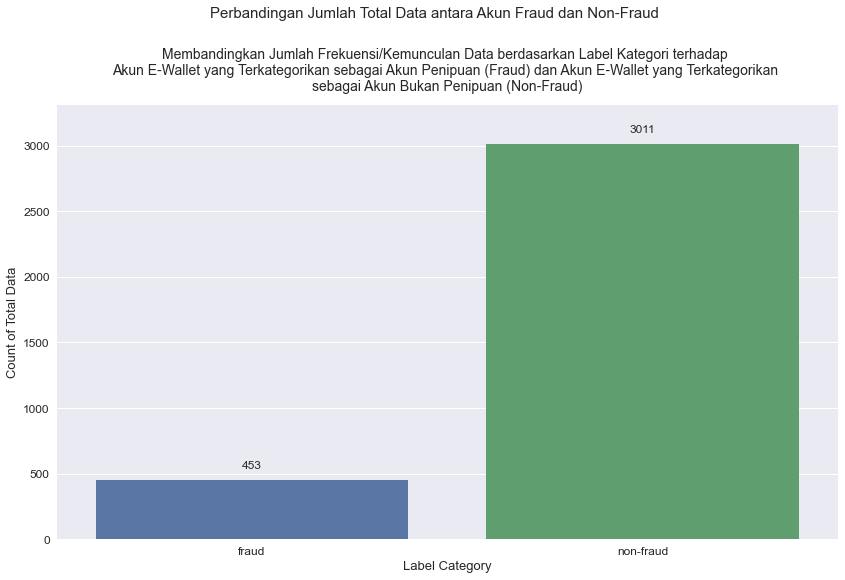

In [202]:
"""
Menampilkan jumlah perbandingan antara total nilai data dari label fraud
yang merupakan sebuah kategori untuk setiap akun/username e-wallet penipuan
dan label non-fraud yang merupakan sebuah kategori untuk setiap akun e-wallet
yang bukan merupakan penipuan pada kolom "category_label" dari variabel DataFrame "data_fraud_classification"
"""
plt.figure(figsize=(14, 8))

bar_count_chart = sns.countplot(x="category_label", data=data_fraud_classification,
                                order=data_fraud_classification["category_label"].value_counts(ascending=True).index)
for i in bar_count_chart.containers:
    bar_count_chart.bar_label(i, padding=10, fmt="%0.f", fontsize=12)
    bar_count_chart.margins(y=0.1)

# Memberikan judul dan sub-judul untuk grafik batang yang membandingkan jumlah data akun fraud dan non-fraud
plt.suptitle("Perbandingan Jumlah Total Data antara Akun Fraud dan Non-Fraud", fontsize=15, y=1.05)
plt.title("Membandingkan Jumlah Frekuensi/Kemunculan Data berdasarkan Label Kategori terhadap \n"
          "Akun E-Wallet yang Terkategorikan sebagai Akun Penipuan (Fraud) dan Akun E-Wallet yang Terkategorikan \n"
          "sebagai Akun Bukan Penipuan (Non-Fraud)", fontsize=14, pad=14)
plt.xlabel("Label Category", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Count of Total Data", fontsize=13)
plt.yticks(fontsize=12)
#plt.savefig("Grafik Visualisasi/Perbandingan Jumlah Akun E-Wallet Fraud dan Non-Fraud dari PT. XYZ.png")
plt.show()

Berdasarkan grafik diatas kita dapat mengetahui jumlah perbandingan data yang dilihat berdasarkan frekuensi/kemunculan dari masing-masing data pada kolom "category_label" yang dimiliki oleh variabel DataFrame "data_fraud_classification". Akun yang terkategorikan sebagai akun/username e-wallet yang bukan penipuan (memiliki label yaitu non-fraud) ternyata memiliki jumlah akun yang sangat banyak dengan total data yakni 3.011. Hal ini artinya sebanyak 3.011 akun/username e-wallet yang berhasil terdaftar dan memiliki catatan perubahan di dalam sistem PT. XYZ merupakan akun-akun yang tidak memiliki niat untuk melakukan penipuan sehingga akun-akun tersebut adalah akun non-fraud. Sedangkan sebanyak 453 akun/username e-wallet yang berhasil terdaftar di dalam sistem dari PT. XYZ merupakan akun penipuan.

Seperti yang sudah dijelaskan sebelumnya untuk mengetahui akun mana saja yang tergolong sebagai akun e-wallet penipuan dan bukan, penelitian ini menggunakan 2 file dataset. Dataset pertama berisikan seluruh daftar nama akun/username e-wallet, baik akun yang terindikasi sebagai akun penipuan maupun akun yang bukan penipuan. Lalu dataset kedua hanya berisikan seluruh daftar nama akun/username e-wallet yang telah terkategorikan sebagai akun penipuan. Maka dari itu proses penyocokkan menjadi syarat utama di dalam penelitian ini karena untuk mengetahui sekaligus memetakan kategori label antara akun penipuan dan akun yang bukan penipuan. Proses penyocokkan untuk mengetahui sekaligus memetakan kategori label antara akun penipuan dan akun yang bukan penipuan hanya dilakukan pada file dataset pertama yang mana telah menjadi format DataFrame dengan nama variabel yaitu "all_username_list" karena di dalam variabel DataFrame "all_username_list" berisikan seluruh daftar nama akun/username e-wallet, baik akun yang memiliki indikasi/mengarah ke penipuan atau akun yang sama sekali tidak memiliki kecondongan untuk melakukan penipuan. Jadi jika suatu nama akun e-wallet dari variabel DataFrame "all_username_list" tidak dimiliki di dalam file dataset kedua, maka nilai kategori yang akan diberikan oleh setiap akun yang memiliki karakteristik tersebut adalah non-fraud yang artinya bahwa akun tersebut bukan merupakan akun penipuan. Sedangkan jika suatu nama akun e-wallet dari variabel DataFrame "all_username_list" dimiliki oleh file dataset kedua, maka nilai kategori yang akan dibuat untuk akun tersebut adalah fraud karena akun tersebut mengartikan akun penipuan.

Dengan grafik diatas sudah sangat jelas bahwasanya di dalam variabel DataFrame "data_fraud_classification" masih memiliki banyak akun-akun yang tidak memiliki indikasi untuk melakukan penipuan karena sebanyak 3.011 akun memiliki label kategori sebagai non-fraud sehingga PT. XYZ dapat mencari cara bagaimana untuk mengatasi 453 akun e-wallet yang memiliki indikasi/kecondongan kepada tindakan penipuan untuk mencegah pengguna lain/perusahaan dirugikan karena terdapatnya akun-akun penipuan tersebut. Beberapa tindakan pencegahan yang dapat dilakukan menurut penelitian ini adalah PT. XYZ dapat memberhentikan 453 akun-akun e-wallet tersebut secara paksa (tindakan blokir) serta memberikan peringatan di dalam aplikasi tersebut agar para pengguna normal dapat berhati-hati jika di dalam aplikasi tersebut terdapat beberapa akun-akun penipuan.

In [ ]:
"""
Menampilkan jumlah nilai persentase terhadap jumlah total frekuensi
terhadap label kategori antara nama akun/username yang memiliki indikasi tindakan penipuan (fraud)
dan nama akun yang tidak memiliki indikasi untuk melakukan tindakan penipuan (non-fraud)
"""
plt.figure(figsize=(14, 8))

percentage_data_fraud = data_fraud_classification["category_label"].value_counts()
plt.pie(percentage_data_fraud, labels = percentage_data_fraud.index, autopct = "%.1f%%", colors = ["tab:blue", "tab:green"])
plt.suptitle("Persentase Jumlah Frekuensi antara Akun Penipuan dan Akun yang Bukan Penipuan", fontsize=15, y=1.02)
plt.title("Nilai Persentase berdasarkan Jumlah Total Kemunculan (Frekuensi) terhadap \n"
          "Akun/Username Penipuan (Fraud) dan Akun/Username yang Bukan Penipuan (Non-Fraud)", fontsize=14, pad=14)
plt.legend(title = "Label Category", loc="upper left", bbox_to_anchor = (1, 1), fontsize=12)
#plt.savefig("Grafik Visualisasi/Persentase dari Jumlah Total Frekuensi terhadap Label dengan Kategori Fraud dan Non-Fraud.png")
plt.show()